<a href="https://colab.research.google.com/github/mihirpatel149606-lang/Statistics-And-Math-For-Data-Science/blob/main/StatsAndMathForDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your Amazon CSV file:


Saving amazon (1).csv to amazon (1).csv


/tmp/ipython-input-2667457691.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


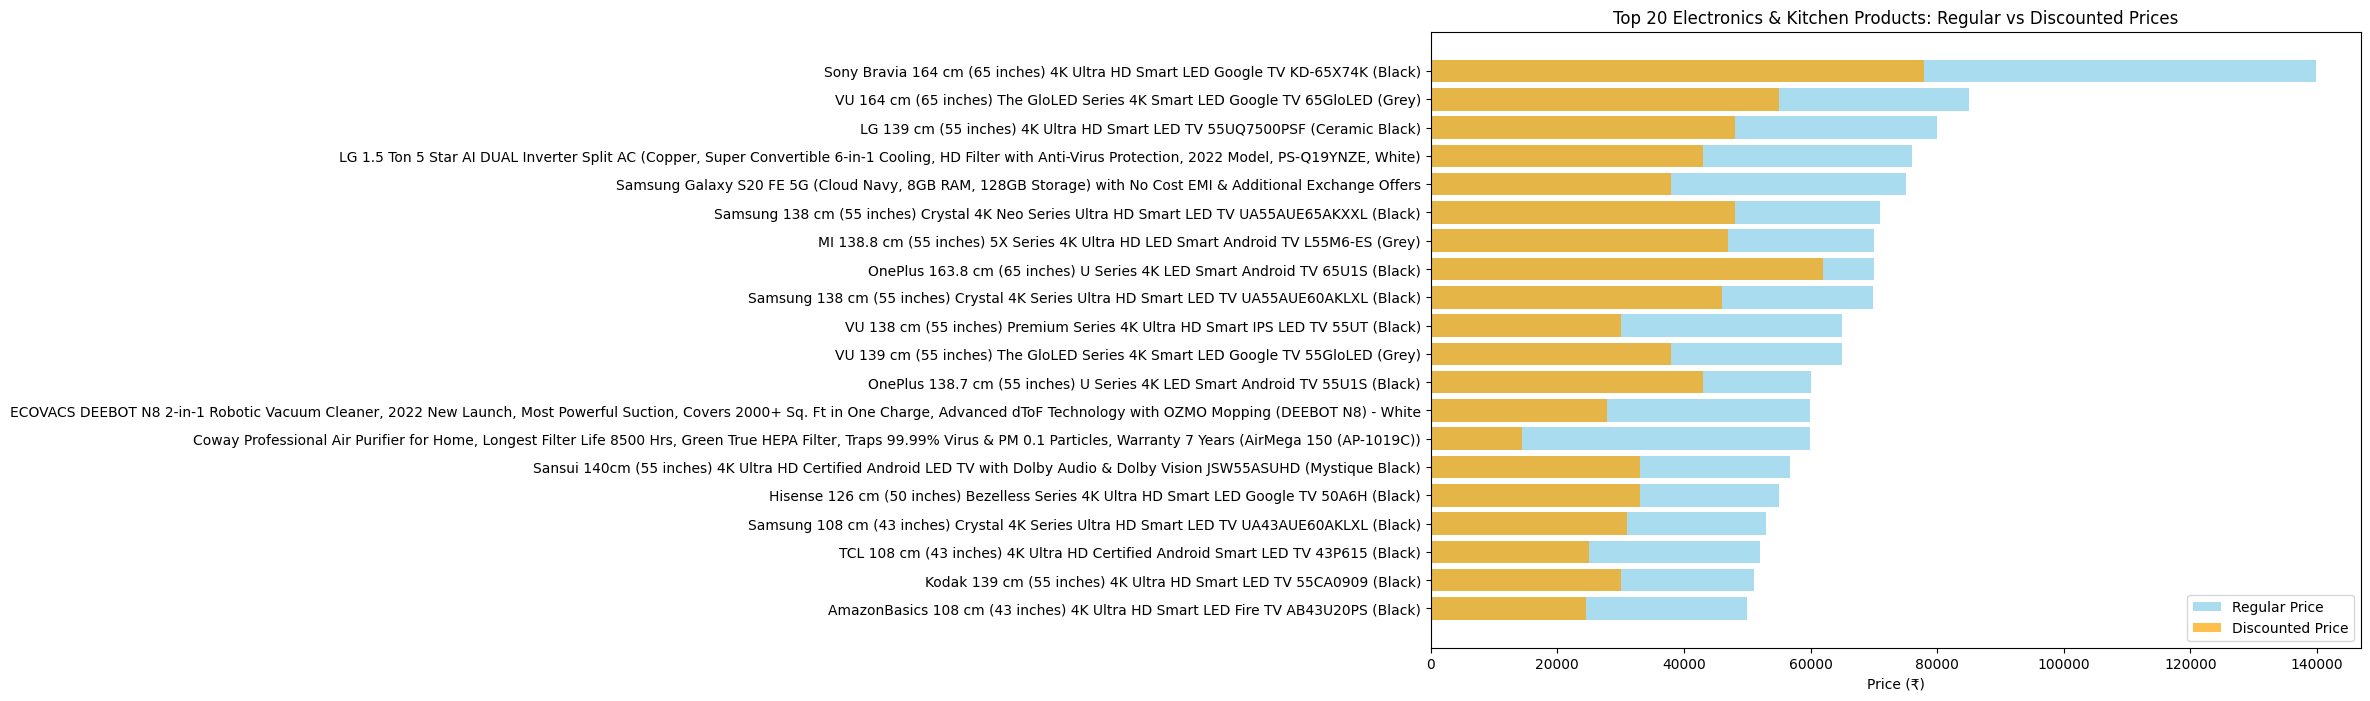

In [ ]:
# Amazon Top 20 Products: Regular vs Discounted Prices (Horizontal Bar Chart)

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 2. Upload CSV
print("Please upload your Amazon CSV file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load CSV into DataFrame
df = pd.read_csv(file_name)

# 3. Clean price columns
def clean_price(price_str):
    if pd.isnull(price_str):
        return None
    return float(str(price_str).replace('‚Çπ', '').replace(',', '').replace('₹', '').strip())

df['discounted_price_num'] = df['discounted_price'].apply(clean_price)
df['actual_price_num'] = df['actual_price'].apply(clean_price)

# 4. Filter for Electronics and Kitchen
df_filtered = df[df['category'].str.contains('Electronics|Kitchen', na=False)].copy()

# 5. Select top 20 products by regular price
top_n = 20
df_top = df_filtered.sort_values('actual_price_num', ascending=False).head(top_n)

# 6. Plot horizontal bar chart
plt.figure(figsize=(12, 8))

# Regular price bars
plt.barh(df_top['product_name'], df_top['actual_price_num'], color='skyblue', label='Regular Price', alpha=0.7)

# Discounted price bars (overlay)
plt.barh(df_top['product_name'], df_top['discounted_price_num'], color='orange', label='Discounted Price', alpha=0.7)

plt.xlabel('Price (₹)')
plt.title(f'Top {top_n} Electronics & Kitchen Products: Regular vs Discounted Prices')
plt.gca().invert_yaxis()  # Highest price on top
plt.legend()
plt.tight_layout()
plt.show()

Please upload your Amazon CSV file:


Saving amazon (1).csv to amazon (1) (1).csv
Summary Statistics by Category (Prices Only):


,product_category,Avg_Discounted_Price,Avg_Regular_Price,Product_Count
0,Electronics,5926.130189,10056.200000,530
1,Kitchen,2330.615647,4162.073661,448


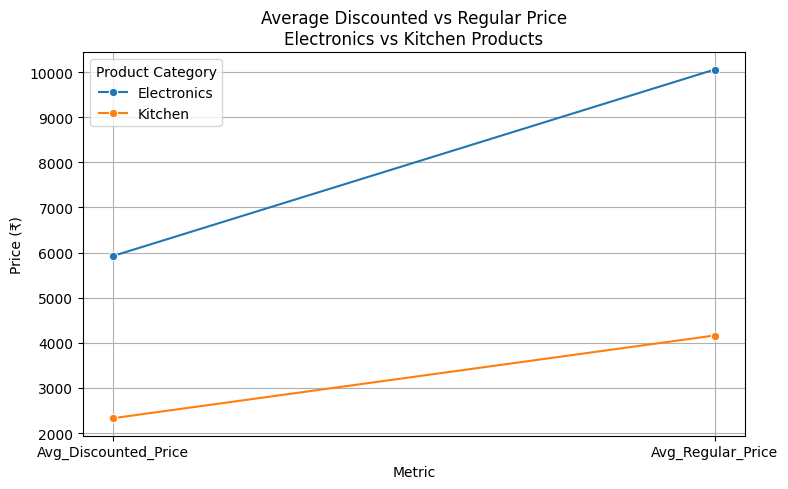

In [ ]:
# Amazon Sales Analysis: Electronics & Kitchen Products (Colab version, Prices Only)

# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 2. Upload the CSV file
print("Please upload your Amazon CSV file:")
uploaded = files.upload()  # Opens file picker
file_name = list(uploaded.keys())[0]

# Load CSV into a DataFrame
df = pd.read_csv(file_name)

# 3. Data Cleaning: Convert price columns to numeric
def clean_price(price_str):
    if pd.isnull(price_str):
        return None
    return float(str(price_str).replace('‚Çπ', '').replace(',', '').replace('₹', '').strip())

df['discounted_price_num'] = df['discounted_price'].apply(clean_price)
df['actual_price_num'] = df['actual_price'].apply(clean_price)

# 4. Filter for Electronics and Kitchen products
def categorize(row):
    cat = str(row['category'])
    if 'Electronics' in cat:
        return 'Electronics'
    elif 'Kitchen' in cat or 'Home&Kitchen' in cat:
        return 'Kitchen'
    else:
        return None

df['product_category'] = df.apply(categorize, axis=1)
filtered_df = df[df['product_category'].isin(['Electronics', 'Kitchen'])].copy()

# 5. Calculate average prices by category
summary = filtered_df.groupby('product_category').agg(
    Avg_Discounted_Price=('discounted_price_num', 'mean'),
    Avg_Regular_Price=('actual_price_num', 'mean'),
    Product_Count=('product_id', 'count')
).reset_index()

# 6. Display summary table
print("Summary Statistics by Category (Prices Only):")
display(summary)

# 7. Prepare data for line chart
metrics = ['Avg_Discounted_Price', 'Avg_Regular_Price']
summary_melted = summary.melt(id_vars='product_category', value_vars=metrics,
                              var_name='Metric', value_name='Value')

# 8. Plot line chart (Prices Only)
plt.figure(figsize=(8, 5))
sns.lineplot(data=summary_melted, x='Metric', y='Value', hue='product_category', marker='o')
plt.title('Average Discounted vs Regular Price\nElectronics vs Kitchen Products')
plt.ylabel('Price (₹)')
plt.xlabel('Metric')
plt.grid(True)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


Upload your Amazon CSV file:


Saving amazon (1).csv to amazon (1) (2).csv

Dataset Loaded. Columns found:
 ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']

Sample rows:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...



Cleaning price columns: ['actual_price', 'discounted_price']
Using column as Q proxy (rating_count): rating_count

Removed 0 rows with missing/zero actual_price. Remaining rows: 1465

Using category column: category

Found 448 rows matching Kitchen, 1081 rows matching Electronics.

Plotting Kitchen results (if model available)


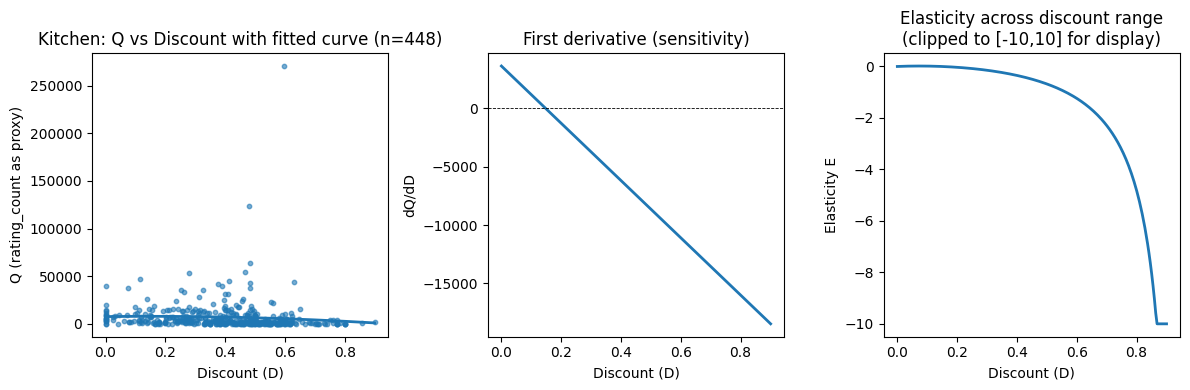


Plotting Electronics results (if model available)


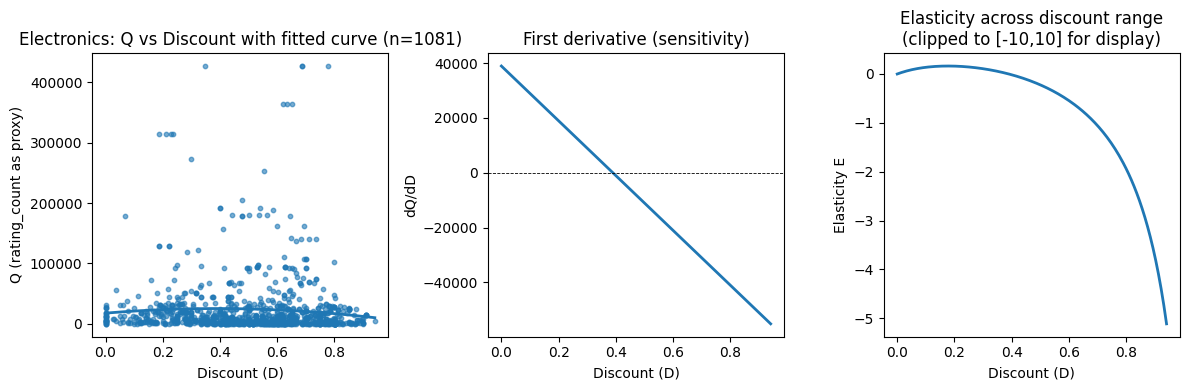


---- Kitchen SUMMARY (n=448) ----
Estimated quadratic model: Q(D) = 7610.103 + 3632.347*D + -12268.793*D^2
Average Discount D_avg = 0.4012
Average Q (rating_count) Q_avg = 6676.493
First derivative at D_avg: dQ/dD = -6211.3639
  Interpretation: dQ/dD > 0  => sales increase when discount increases.
Second derivative (constant): d2Q/dD2 = -24537.5853
  Interpretation: negative => diminishing returns: each extra discount yields less additional sales.
Elasticity at average: E(D_avg) = -0.3732
  Interpretation: Inelastic (<1) => Q not very responsive to discount percent changes.
Proportion of discount-range points with |E|>1: 37.5%

---- Electronics SUMMARY (n=1081) ----
Estimated quadratic model: Q(D) = 17731.902 + 38951.131*D + -49958.076*D^2
Average Discount D_avg = 0.5087
Average Q (rating_count) Q_avg = 22258.170
First derivative at D_avg: dQ/dD = -11879.0614
  Interpretation: dQ/dD > 0  => sales increase when discount increases.
Second derivative (constant): d2Q/dD2 = -99916.1523
  I

In [ ]:
# -------------------------------
# AMAZON DISCOUNT EFFECTIVENESS ANALYSIS (Colab-ready)
# -------------------------------
# Paste this entire block into one Google Colab cell and run.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# -----------------------
# 1) UPLOAD DATA
# -----------------------
print("Upload your Amazon CSV file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print("\nDataset Loaded. Columns found:\n", df.columns.tolist())
print("\nSample rows:")
display(df.head())

# -----------------------
# 2) CLEANING FUNCTIONS
# -----------------------
def clean_price_val(x):
    """Remove currency symbols, commas, and convert to float. Return NaN for unknown."""
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float)):
        return float(x)
    s = str(x)
    # Common currency/punctuation cleanup
    s = s.replace('₹', '').replace('$', '').replace('USD', '')
    s = s.replace(',', '').replace(' ', '').strip()
    # Sometimes values include trailing text like "from ₹399" or "₹399 - 599"
    # Keep first numeric chunk
    if '-' in s:
        s = s.split('-')[0]
    # Remove percent sign if present (not expected here)
    s = s.replace('%', '')
    try:
        return float(s)
    except:
        return np.nan

def clean_int_val(x):
    """Convert rating_count-like columns to integer; fill NaN with 0."""
    if pd.isna(x):
        return 0
    if isinstance(x, (int, np.integer)):
        return int(x)
    s = str(x).strip()
    # sometimes has commas
    s = s.replace(',', '')
    # if empty after strip -> 0
    if s == '':
        return 0
    try:
        return int(float(s))
    except:
        return 0

# -----------------------
# 3) APPLY CLEANING
# -----------------------
# Try to identify price columns (common names: actual_price, discounted_price, price, mrp, etc.)
# The dataset appears to have 'actual_price' and 'discounted_price' from your earlier messages.
price_cols = []
if 'actual_price' in df.columns and 'discounted_price' in df.columns:
    price_cols = ['actual_price', 'discounted_price']
else:
    # fallback: try to locate columns containing 'price'
    price_cols = [c for c in df.columns if 'price' in c.lower()]
    if len(price_cols) < 2:
        raise ValueError("Couldn't automatically find price columns. Ensure your CSV has 'actual_price' and 'discounted_price' or columns containing 'price' in their names.")

print("\nCleaning price columns:", price_cols)
for c in price_cols:
    df[c + "_clean"] = df[c].apply(clean_price_val)

# rating_count cleaning (we will use as Q)
rating_col_candidates = [c for c in df.columns if 'rating_count' in c.lower() or 'rating' == c.lower() or 'review_count' in c.lower()]
if 'rating_count' in df.columns:
    rating_col = 'rating_count'
elif rating_col_candidates:
    rating_col = rating_col_candidates[0]
else:
    # fallback: try 'rating' column then create from it (but we need counts)
    raise ValueError("Couldn't find a suitable 'rating_count' column in your CSV. Please ensure there's a column representing rating count or review count.")

print("Using column as Q proxy (rating_count):", rating_col)
df['Q'] = df[rating_col].apply(clean_int_val)

# Keep useful columns
df_clean = df.copy()
df_clean['actual_price'] = df_clean[price_cols[0] + "_clean"]
df_clean['discounted_price'] = df_clean[price_cols[1] + "_clean"]

# Remove rows with missing or zero actual_price (can't compute discount)
before = len(df_clean)
df_clean = df_clean[~df_clean['actual_price'].isna()]
df_clean = df_clean[df_clean['actual_price'] > 0]
after = len(df_clean)
print(f"\nRemoved {before-after} rows with missing/zero actual_price. Remaining rows: {after}")

# Compute Discount
df_clean['Discount'] = (df_clean['actual_price'] - df_clean['discounted_price']) / df_clean['actual_price']
# Clamp discount between 0 and 1 for sanity (some negative or >1 due to data issues)
df_clean['Discount'] = df_clean['Discount'].replace([np.inf, -np.inf], np.nan)
df_clean['Discount'] = df_clean['Discount'].fillna(0)
df_clean.loc[df_clean['Discount'] < 0, 'Discount'] = 0
df_clean.loc[df_clean['Discount'] > 1, 'Discount'] = 1

# -----------------------
# 4) DEFINE CATEGORIES: Kitchen vs Electronics
# -----------------------
# The dataset's category field may be a long string. Match keywords.
cat_col_candidates = [c for c in df_clean.columns if 'category' in c.lower()]
if len(cat_col_candidates) == 0:
    raise ValueError("Couldn't find a category column. Please ensure your CSV has a 'category' column.")
cat_col = cat_col_candidates[0]
print("\nUsing category column:", cat_col)

# keyword matching (expand as needed)
kitchen_mask = df_clean[cat_col].fillna('').str.contains('Kitchen', case=False, na=False) | df_clean[cat_col].fillna('').str.contains('Home&Kitchen', case=False, na=False)
electronics_mask = df_clean[cat_col].fillna('').str.contains('Electronics', case=False, na=False) | df_clean[cat_col].fillna('').str.contains('Computer', case=False, na=False) | df_clean[cat_col].fillna('').str.contains('Accessories', case=False, na=False)

kitchen_df = df_clean[kitchen_mask].copy()
electronics_df = df_clean[electronics_mask].copy()

print(f"\nFound {len(kitchen_df)} rows matching Kitchen, {len(electronics_df)} rows matching Electronics.")

if len(kitchen_df) == 0 or len(electronics_df) == 0:
    print("\nWARNING: One of the category subsets is empty. Check your 'category' values and keyword matching.")
    # Continue; analysis will handle empties gracefully later.

# -----------------------
# 5) Fit polynomial model Q = f(D) (degree 2) for each category
# -----------------------
def fit_poly_model(df_subset, degree=2):
    """Returns model, poly transformer, and arrays D_grid, Q_pred for plotting."""
    if df_subset.shape[0] < 3:
        return None, None, None, None  # not enough points
    D = df_subset['Discount'].values.reshape(-1,1)
    Q = df_subset['Q'].values.reshape(-1,1)
    poly = PolynomialFeatures(degree=degree)
    Xp = poly.fit_transform(D)
    model = LinearRegression().fit(Xp, Q)
    # generate smooth grid for plotting
    D_grid = np.linspace(0, max(0.01, D.max()), 200).reshape(-1,1)
    Q_pred = model.predict(poly.transform(D_grid))
    return model, poly, D_grid.flatten(), Q_pred.flatten()

k_model, k_poly, k_Dgrid, k_Qpred = fit_poly_model(kitchen_df)
e_model, e_poly, e_Dgrid, e_Qpred = fit_poly_model(electronics_df)

# -----------------------
# 6) Calculus: derivatives & elasticity
# For polynomial Q(D) = c0 + c1*D + c2*D^2  (coeff order depends on poly output)
# When using PolynomialFeatures(degree=2) the transform gives: [1, D, D^2]
# model.coef_ shape: (1, n_features). model.coef_[0][0] corresponds to bias multiplier for '1' term (should be 0)
# model.intercept_ is the intercept.
# -----------------------
def get_coeffs_quadratic(model, poly):
    """Return coefficients [c0, c1, c2] so that Q = c0 + c1*D + c2*D^2."""
    if model is None:
        return None
    # For PolynomialFeatures(degree=2) order is [1, D, D^2]
    coefs = model.coef_.flatten()  # shape (n_features,)
    # model.intercept_ is c0 too — but sklearn splits intercept separately.
    # The constant term is model.intercept_
    c0 = float(model.intercept_)
    # c1 is coef for D (index 1) if transform order is [1, D, D^2]
    if len(coefs) >= 3:
        c1 = float(coefs[1])
        c2 = float(coefs[2])
    elif len(coefs) == 2:  # linear case
        c1 = float(coefs[1])
        c2 = 0.0
    else:
        c1 = 0.0; c2 = 0.0
    return c0, c1, c2

def first_derivative_q(c1, c2, D):
    """dQ/dD = c1 + 2*c2*D"""
    return c1 + 2*c2*D

def second_derivative_q(c2):
    """d2Q/dD2 = 2*c2 (constant for quadratic)"""
    return 2*c2

def elasticity_at(c1, c2, D, Q):
    """E = (dQ/dD) * (D / Q). If Q==0, return nan."""
    dQdD = first_derivative_q(c1, c2, D)
    with np.errstate(divide='ignore', invalid='ignore'):
        E = dQdD * (D / Q)
    return E

# Compute coefficients and statistics for kitchen
results = {}
for name, model_obj, poly_obj, subset_df, Dgrid, Qpred in [
    ('Kitchen', k_model, k_poly, kitchen_df, k_Dgrid, k_Qpred),
    ('Electronics', e_model, e_poly, electronics_df, e_Dgrid, e_Qpred)
]:
    if model_obj is None:
        results[name] = None
        continue
    c0, c1, c2 = get_coeffs_quadratic(model_obj, poly_obj)
    # stats
    D_avg = float(subset_df['Discount'].mean()) if subset_df.shape[0]>0 else float('nan')
    Q_avg = float(subset_df['Q'].mean()) if subset_df.shape[0]>0 else float('nan')
    # derivatives at avg D
    d1_at_avg = first_derivative_q(c1, c2, D_avg)
    d2_const = second_derivative_q(c2)
    E_at_avg = elasticity_at(c1, c2, D_avg, Q_avg)
    # elasticity across Dgrid
    Qpred_grid = Qpred
    d1_grid = first_derivative_q(c1, c2, Dgrid)
    E_grid = elasticity_at(c1, c2, Dgrid, Qpred_grid)
    results[name] = {
        'c0': c0, 'c1': c1, 'c2': c2,
        'D_avg': D_avg, 'Q_avg': Q_avg,
        'd1_at_avg': float(d1_at_avg), 'd2_const': float(d2_const),
        'E_at_avg': float(E_at_avg if not np.isnan(E_at_avg) else 0.0),
        'Dgrid': Dgrid, 'Qpred_grid': Qpred_grid, 'd1_grid': d1_grid, 'E_grid': E_grid,
        'n_obs': subset_df.shape[0]
    }

# -----------------------
# 7) PLOTS: Q vs D with fitted curve, derivative, elasticity
# -----------------------
def plot_results(name, subset_df, res):
    if res is None:
        print(f"\n{name}: Not enough data to fit a model (need at least 3 points). Skipping plots.")
        return
    plt.figure(figsize=(12, 4))
    # Q vs D scatter + fit
    plt.subplot(1,3,1)
    plt.scatter(subset_df['Discount'], subset_df['Q'], alpha=0.6, s=10)
    plt.plot(res['Dgrid'], res['Qpred_grid'], linewidth=2)
    plt.xlabel('Discount (D)')
    plt.ylabel('Q (rating_count as proxy)')
    plt.title(f'{name}: Q vs Discount with fitted curve (n={res["n_obs"]})')

    # dQ/dD over D
    plt.subplot(1,3,2)
    plt.plot(res['Dgrid'], res['d1_grid'], linewidth=2)
    plt.axhline(0, color='k', linestyle='--', linewidth=0.6)
    plt.xlabel('Discount (D)')
    plt.ylabel('dQ/dD')
    plt.title('First derivative (sensitivity)')

    # Elasticity over D (clip extremes for readability)
    plt.subplot(1,3,3)
    E_clip = np.copy(res['E_grid'])
    # mask extremely large values for plotting
    E_clip = np.where(np.isfinite(E_clip), E_clip, np.nan)
    # small smoothing: replace huge absolute values for visualization
    E_clip = np.where(np.abs(E_clip) > 10, np.sign(E_clip)*10, E_clip)
    plt.plot(res['Dgrid'], E_clip, linewidth=2)
    plt.xlabel('Discount (D)')
    plt.ylabel('Elasticity E')
    plt.title('Elasticity across discount range\n(clipped to [-10,10] for display)')

    plt.tight_layout()
    plt.show()

print("\nPlotting Kitchen results (if model available)")
plot_results('Kitchen', kitchen_df, results.get('Kitchen'))
print("\nPlotting Electronics results (if model available)")
plot_results('Electronics', electronics_df, results.get('Electronics'))

# -----------------------
# 8) PRINT NUMERICAL RESULTS + INTERPRETATIONS
# -----------------------
def interpret_results(name, res):
    if res is None:
        print(f"\n{name} — Not enough data to model. Need at least 3 observations.")
        return
    print(f"\n---- {name} SUMMARY (n={res['n_obs']}) ----")
    print(f"Estimated quadratic model: Q(D) = {res['c0']:.3f} + {res['c1']:.3f}*D + {res['c2']:.3f}*D^2")
    print(f"Average Discount D_avg = {res['D_avg']:.4f}")
    print(f"Average Q (rating_count) Q_avg = {res['Q_avg']:.3f}")
    print(f"First derivative at D_avg: dQ/dD = {res['d1_at_avg']:.4f}")
    print("  Interpretation: dQ/dD > 0  => sales increase when discount increases.")
    print(f"Second derivative (constant): d2Q/dD2 = {res['d2_const']:.4f}")
    if res['d2_const'] < 0:
        print("  Interpretation: negative => diminishing returns: each extra discount yields less additional sales.")
    elif res['d2_const'] > 0:
        print("  Interpretation: positive => increasing returns (rare).")
    else:
        print("  Interpretation: ~0 => linear sensitivity (constant marginal effect).")
    print(f"Elasticity at average: E(D_avg) = {res['E_at_avg']:.4f}")
    if abs(res['E_at_avg']) > 1:
        print("  Interpretation: Elastic (>1) => Q is responsive to discount percent changes.")
    else:
        print("  Interpretation: Inelastic (<1) => Q not very responsive to discount percent changes.")
    # Additional: proportion of Dgrid where |E|>1
    E_grid = res['E_grid']
    finite_mask = np.isfinite(E_grid)
    if finite_mask.sum() > 0:
        prop_elastic = np.mean(np.abs(E_grid[finite_mask]) > 1)
        print(f"Proportion of discount-range points with |E|>1: {prop_elastic*100:.1f}%")
    else:
        print("Elasticity grid not finite for plotting/analysis.")

# Print for both
interpret_results('Kitchen', results.get('Kitchen'))
interpret_results('Electronics', results.get('Electronics'))

# -----------------------
# 9) FORMULAS SHOWN (for report)
# -----------------------
print("\n\n--- FORMULAS USED (for your Methods section) ---")
print("Discount = (P_original - P_sale) / P_original")
print("We fit Q = f(D) with a quadratic: Q(D) = c0 + c1*D + c2*D^2")
print("First derivative: dQ/dD = c1 + 2*c2*D")
print("Second derivative: d^2Q/dD^2 = 2*c2")
print("Elasticity (w.r.t discount): E = (dQ/dD) * (D / Q)")
print("Interpretation: |E| > 1 => elastic (responsive); |E| < 1 => inelastic (not responsive).")

# -----------------------
# 10) FINAL CONCLUSIONS (auto-generated from results)
# -----------------------
print("\n\n================ FINAL CONCLUSIONS ================\n")
# Guard for availability
k = results.get('Kitchen')
e = results.get('Electronics')

# Basic comparative statements
if k is None and e is None:
    print("No models estimated for Kitchen or Electronics (insufficient data).")
else:
    if k is not None and e is not None:
        # Compare first derivatives at avg D
        print("1) Which category benefits more from price cuts (first-derivative comparison):")
        print(f"   Kitchen dQ/dD at D_avg = {k['d1_at_avg']:.4f}; Electronics dQ/dD at D_avg = {e['d1_at_avg']:.4f}")
        if k['d1_at_avg'] > e['d1_at_avg']:
            print("   => Kitchen shows higher marginal increase in Q per unit discount; more price-sensitive by marginal effect.")
        else:
            print("   => Electronics shows higher marginal effect (rare).")

        # Compare elasticity magnitudes
        print("\n2) Elasticity comparison (percentage responsiveness):")
        print(f"   Kitchen E(D_avg) = {k['E_at_avg']:.4f}; Electronics E(D_avg) = {e['E_at_avg']:.4f}")
        if abs(k['E_at_avg']) > abs(e['E_at_avg']):
            print("   => Kitchen is relatively more elastic: discounts yield larger percent changes in Q.")
        else:
            print("   => Electronics is relatively more elastic (or both similar).")

        # Diminishing returns check
        print("\n3) Diminishing returns:")
        if k['d2_const'] < 0:
            print("   Kitchen shows diminishing returns (d2 < 0).")
        else:
            print("   Kitchen does not show diminishing returns strongly.")
        if e['d2_const'] < 0:
            print("   Electronics shows diminishing returns (d2 < 0).")
        else:
            print("   Electronics does not show diminishing returns strongly.")
    else:
        # If only one model exists, summarize that one
        which = 'Kitchen' if k is not None else 'Electronics'
        res = k if k is not None else e
        print(f"Only {which} had enough data for modeling (n={res['n_obs']}). Summary:")
        interpret_results(which, res)

    # Practical recommendation
    print("\n4) Practical recommendations for Amazon (based on these results):")
    if k is not None and e is not None:
        # If both inelastic, warn about margin loss
        if abs(k['E_at_avg']) < 1 and abs(e['E_at_avg']) < 1:
            print("   - Both categories appear inelastic at average discounts: large across-the-board discounts likely reduce margins more than they increase quantity sold. Prefer targeted, small discounts for high-risk items.")
        elif abs(k['E_at_avg']) >= 1:
            print("   - Kitchen is elastic: targeted discounts can boost sales and may be profitable.")
        else:
            print("   - Electronics shows weak responsiveness: avoid large discounts; consider bundling or value-add promotions instead of price cuts.")
    else:
        print("   - Insufficient data to issue cross-category recommendations; examine dataset or broaden category matching keywords.")

print("\n==================================================\n")

# END


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# -----------------------------------------------------
# 1. Load the dataset
# -----------------------------------------------------
print("Please upload your Amazon CSV file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print("Dataset Loaded Successfully!")
print(df.head())

# -----------------------------------------------------
# 2. Clean the dataset
# -----------------------------------------------------

def clean_price(x):
    if isinstance(x, str):
        return float(x.replace("₹", "").replace(",", "").strip())
    else:
        return float(x)

df["actual_price"] = df["actual_price"].apply(clean_price)
df["discounted_price"] = df["discounted_price"].apply(clean_price)

df["discount_percentage"] = (
    df["discount_percentage"]
    .str.replace("%", "")
    .astype(float)
)

# rating_count may contain commas
df["rating_count"] = (
    df["rating_count"]
    .astype(str)
    .str.replace(",", "")
    .replace("nan", np.nan)
    .astype(float)
)

# Drop rows missing sales proxy
df = df.dropna(subset=["rating_count"])

# -----------------------------------------------------
# 3. Compute Discount (D)
# -----------------------------------------------------
df["discount"] = (df["actual_price"] - df["discounted_price"]) / df["actual_price"]

# Clamp discount between 0 and 1
df["discount"] = df["discount"].clip(0, 1)

# -----------------------------------------------------
# 4. Create Category Groups (Kitchen vs Electronics)
# -----------------------------------------------------
def classify_category(cat):
    cat = str(cat).lower()
    if "kitchen" in cat:
        return "Kitchen"
    elif "electronic" in cat or "computer" in cat:
        return "Electronics"
    else:
        return "Other"

df["main_category"] = df["category"].apply(classify_category)

# Filter only two categories
df_use = df[df["main_category"].isin(["Kitchen", "Electronics"])]

# -----------------------------------------------------
# 5. Sales proxy (Q)
# -----------------------------------------------------
df_use["Q"] = df_use["rating_count"]

# -----------------------------------------------------
# 6. Fit Q = f(D) using regression (linear for calculus)
# -----------------------------------------------------
from sklearn.linear_model import LinearRegression

results = {}

for cat in ["Kitchen", "Electronics"]:
    temp = df_use[df_use["main_category"] == cat][["discount", "Q"]]

    X = temp[["discount"]]
    y = temp["Q"]

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]          # dQ/dD
    intercept = model.intercept_

    results[cat] = {
        "slope_dQdD": slope,
        "intercept": intercept
    }

# -----------------------------------------------------
# 7. Compute Elasticity
# -----------------------------------------------------
elasticity = []

for cat in ["Kitchen", "Electronics"]:
    temp = df_use[df_use["main_category"] == cat]

    D_mean = temp["discount"].mean()
    Q_mean = temp["Q"].mean()

    dQdD = results[cat]["slope_dQdD"]

    E = dQdD * (D_mean / Q_mean)

    elasticity.append([cat, dQdD, D_mean, Q_mean, E])

elasticity_df = pd.DataFrame(
    elasticity,
    columns=["Category", "dQ/dD", "Avg Discount", "Avg Q", "Elasticity"]
)

print("\n=== Calculus-Based Results ===\n")
print(elasticity_df)

# -----------------------------------------------------
# 8. Second Derivative (d2Q/dD2)
# Use quadratic regression: Q = aD² + bD + c --> second derivative = 2a
# -----------------------------------------------------
from sklearn.preprocessing import PolynomialFeatures

second_derivative = []

for cat in ["Kitchen", "Electronics"]:
    temp = df_use[df_use["main_category"] == cat]

    X = temp[["discount"]]
    y = temp["Q"]

    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)

    a = model_poly.coef_[2]  # coefficient of D^2

    second_derivative.append([cat, 2*a])

second_df = pd.DataFrame(
    second_derivative,
    columns=["Category", "Second_Derivative"]
)

print("\n=== Second Derivative Results (d²Q/dD²) ===\n")
print(second_df)



Please upload your Amazon CSV file:


Saving amazon (1).csv to amazon (1) (4).csv
Dataset Loaded Successfully!
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099       

Please upload your Amazon sales CSV file:


Saving amazon (1).csv to amazon (1) (10).csv
Fitted Sales Function: Q(D) = 13213.77 + 26072.04*D - -26816.04*D^2
   Discount   Sensitivity  Elasticity           Elasticity_Interpretation  \
0  0.636943  60232.609836    0.942638  Inelastic - Discount Not Effective   
1  0.429799  49123.085080    0.718787  Inelastic - Discount Not Effective   
2  0.895208  74083.918491    1.142591        Elastic - Discount Effective   
3  0.529328  54460.989322    0.834909  Inelastic - Discount Not Effective   
4  0.614035  59004.028109    0.921109  Inelastic - Discount Not Effective   

   Second_Derivative Returns_Interpretation  
0       53632.087225     Increasing Returns  
1       53632.087225     Increasing Returns  
2       53632.087225     Increasing Returns  
3       53632.087225     Increasing Returns  
4       53632.087225     Increasing Returns  


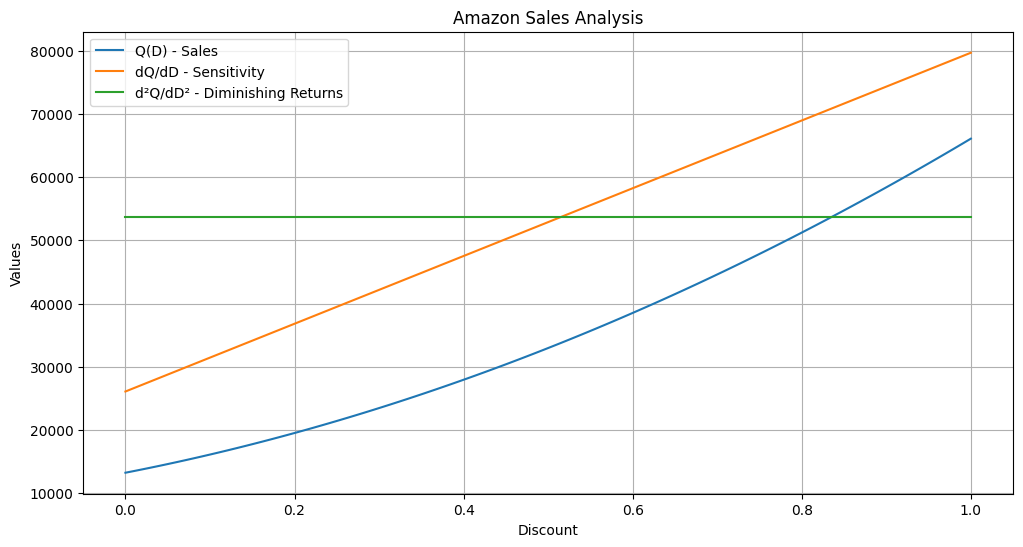


Discount that maximizes sales: 0.4861 (48.61%)
Maximum predicted sales at this discount: 19551


In [ ]:
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload CSV
print("Please upload your Amazon sales CSV file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 2. Clean numeric columns
df['P_original'] = pd.to_numeric(df['actual_price'].replace('[₹,]', '', regex=True), errors='coerce')
df['P_sale'] = pd.to_numeric(df['discounted_price'].replace('[₹,]', '', regex=True), errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].replace('[,]', '', regex=True), errors='coerce')

# 3. Drop rows with missing values in these columns
df = df.dropna(subset=['P_original', 'P_sale', 'rating_count'])

# 4. Compute Discount
df['Discount'] = (df['P_original'] - df['P_sale']) / df['P_original']

# 5. Fit quadratic sales function
D_vals = df['Discount'].values
Q_vals = df['rating_count'].values

coeffs = np.polyfit(D_vals, Q_vals, 2)  # Quadratic fit
c, b, a = coeffs
print(f"Fitted Sales Function: Q(D) = {a:.2f} + {b:.2f}*D - {c:.2f}*D^2")

# 6. Define symbolic function
D = sp.symbols('D')
Q = a + b*D - c*D**2
Q_prime = sp.diff(Q, D)
Q_double_prime = sp.diff(Q_prime, D)

# 7. Compute Sensitivity, Elasticity, Second Derivative
def compute_metrics(discount_value):
    Q_val = Q.subs(D, discount_value)
    Qp_val = Q_prime.subs(D, discount_value)
    Qpp_val = Q_double_prime.subs(D, discount_value)
    E_val = Qp_val * (discount_value / Q_val) if Q_val != 0 else np.nan
    return pd.Series([float(Qp_val), float(E_val), float(Qpp_val)])

df[['Sensitivity', 'Elasticity', 'Second_Derivative']] = df['Discount'].apply(compute_metrics)

# 8. Interpret Elasticity and Returns
df['Elasticity_Interpretation'] = df['Elasticity'].apply(lambda x: 'Elastic - Discount Effective' if abs(x)>1 else 'Inelastic - Discount Not Effective')
df['Returns_Interpretation'] = df['Second_Derivative'].apply(lambda x: 'Diminishing Returns' if x < 0 else 'Increasing Returns')

# 9. Display results
print(df[['Discount','Sensitivity','Elasticity','Elasticity_Interpretation','Second_Derivative','Returns_Interpretation']].head())

# 10. Plot
D_plot = np.linspace(0, 1, 100)
Q_plot = [Q.subs(D,dv) for dv in D_plot]
Qp_plot = [Q_prime.subs(D,dv) for dv in D_plot]
Qpp_plot = [Q_double_prime.subs(D,dv) for dv in D_plot]

plt.figure(figsize=(12,6))
plt.plot(D_plot, Q_plot, label='Q(D) - Sales')
plt.plot(D_plot, Qp_plot, label='dQ/dD - Sensitivity')
plt.plot(D_plot, Qpp_plot, label='d²Q/dD² - Diminishing Returns')
plt.xlabel('Discount')
plt.ylabel('Values')
plt.title('Amazon Sales Analysis')
plt.legend()
plt.grid(True)
plt.show()

# 12. Find the discount that maximizes sales
D_max = -b / (2*c)
Q_max = a + b*D_max + c*D_max**2

print(f"\nDiscount that maximizes sales: {D_max:.4f} ({D_max*100:.2f}%)")
print(f"Maximum predicted sales at this discount: {Q_max:.0f}")


